# Exercise 6：
# Predicting Titanic Survival with Logistic Regression

## Analyse Objectives

The purpose of this data analysis report is to perform logistic regression analyses of survivorship based on attributes such as gender and cabin class of Titanic passengers, so that the resulting model can be used to predict whether a passenger with unknown survivorship survived the sinking based on the attributes.

## Introduction

> RMS Titanic (English: RMS Titanic) was an Olympic-class liner that sank in April 1912 after hitting an iceberg on her maiden voyage. Titanic was the 2nd of 3 superliners in her class, and along with sister ships Olympic and Britannic, provided Atlantic travel for White Star Line passengers.

> Built by the Harland & Wolff shipyard in Belfast, Northern Ireland, Titanic was the largest passenger liner of her time, and because of her size, comparable to that of a modern aircraft carrier, she was known as "The Giant Cruise Ship God Couldn't Sink". On its maiden voyage, the Titanic sailed from Southampton, England, via Cherbourg-Octeville, France, and Queenstown, Ireland, with plans to cross the Atlantic Ocean to New York City, USA. However, due to human error, it struck an iceberg at 11:40 p.m. ship's time on the night of 14 April 1912; 2 hours and 40 minutes later, at 02:20 a.m. on 15 April, the ship sank in the Atlantic Ocean after splitting in half, killing more than 1,500 people, making it one of the largest shipwrecks of the 20th century, and one of the most widely known shipwrecks of all time.

The dataset consists of two data tables: `titanic_train.csv` and `titanic_test.csv`.

`titanic_train.csv` records the survival of more than eight hundred Titanic passengers after the sinking, as well as information about the passengers, including the class of cabin they were in, their gender, their age, the number of companions/siblings travelling with them, the number of parents/children travelling with them, and so on.

`titanic_test.csv` contains only information about the passengers (who are not in `titanic_train.csv`), and this file can be used to predict whether or not a passenger survived.

The meaning of each column of `titanic_train.csv` is as follows:
- PassengerId: passenger id
- survival: whether survived or not
   - 0 No
   - 1 yes
- pclass: cabin class
   - 1 First class
   - 2 second class
   - 3 third class
- sex
- Age: age
- sibsp: number of travelling companions/siblings
- parch: number of parents/children travelling together
- ticket: ticket number
- fare: fare amount
- cabin
- embarked
   - C Cherbourg
   - Q Queenstown
   - S Southampton
   
Each column of `titanic_test.csv` has the same meaning as above, but does not have the data for the survival variable, i.e. whether or not it survived.

# Loading Data

In [343]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [344]:
df = pd.read_csv('titanic_train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Summary:** No structure problem here.

#  Evaluating Data

### 1. missing Data

In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**summary:**
* `Age`, `Cabin`, `Embarked` have null value
* `PasserengerId` ---> Dype:str
* `Survived`, `Pclass`, `Sex`, `Embarked` ---> Dype:category

In [346]:
df['PassengerId'] = df['PassengerId'].astype("str")
df['Survived'] = df['Survived'].astype("category")
df['Pclass'] = df['Pclass'].astype("category")
df['Sex'] = df['Sex'].astype("category")
df['Embarked'] = df['Embarked'].astype("category")

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


In [348]:
# deal with 'Age'
df[df['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [349]:
average_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(average_age)
df['Age'].isna().sum()

0

In [350]:
# deal with 'Cabin'
df[df['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


Too many missing data here, retain the values.

In [351]:
# deal with 'Embarked'
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


The port of embarkation is not a key factor affecting the probability of survival and will not be included within the independent variables of the logistic regression, and even if it is missing it will not affect the modelling, so these observations can be retained.

### 2. Duplicated Data

In [352]:
df['PassengerId'].duplicated().sum()

0

### 3. Inconsistent Data

In [353]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [354]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [355]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [356]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

**summary:**
no inconsistent value

### 4. Invalid Data

In [357]:
df.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


**Summary:** This dataset do not exist invalid data.

# Data Collection

Create a new feature 'FamilyNum' to calculate the number of family member for each passenger.

In [358]:
df['FamilyNum'] = df['SibSp'] + df['Parch']
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


# Data Exploration

In [359]:
sns.set_palette("pastel")

## Percentage of Survived

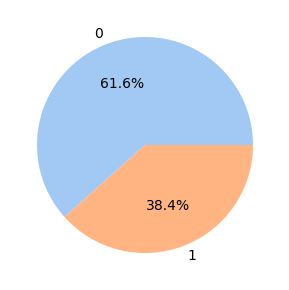

In [360]:
plt.figure(figsize=(4,3))
survived_count = df['Survived'].value_counts()
survived_label = survived_count.index
plt.pie(survived_count, labels=survived_label, autopct='%.1f%%')
plt.show()

From the pie chart above, there were more passengers killed on Titanic than survived, at a ratio of about 3:2.

## Relationship between 'Age' and 'Survived'

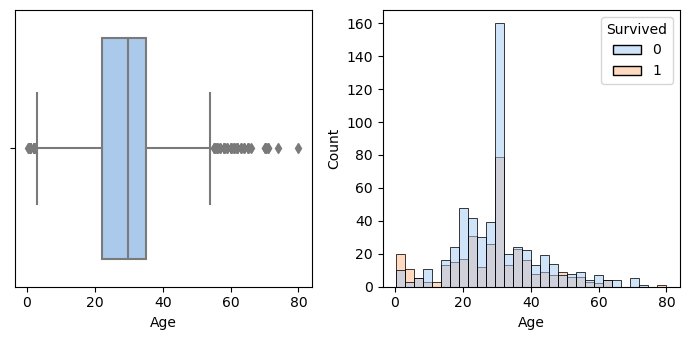

In [361]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axes = plt.subplots(1, 2)
sns.boxplot(data = df, x='Age', ax=axes[0])
sns.histplot(df, x='Age', hue='Survived', ax = axes[1])
plt.show()

* Most passerangers aged from 20 to 40.
* Passenagers from 0 to 5 have high survived rate than other age group.

## Relationship between 'Sex' and 'Survived'

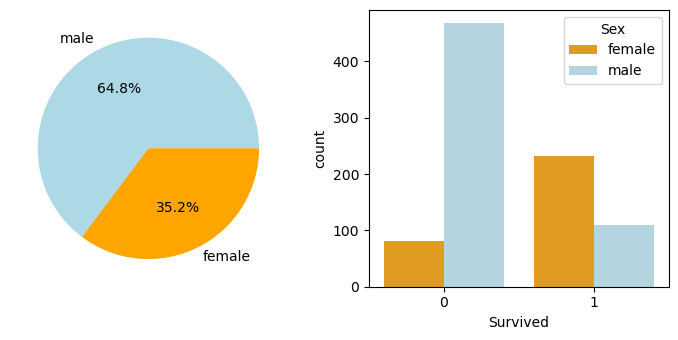

In [362]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

colors = {'male': 'lightblue', 'female': 'orange'}
sex_count = df['Sex'].value_counts()
sex_label = sex_count.index
sex_colors = [colors[label] for label in sex_label]

figure, axes = plt.subplots(1, 2)
axes[0].pie(sex_count, labels=sex_label, colors=sex_colors, autopct='%.1f%%')
sns.countplot(data=df, x='Survived', hue='Sex', palette=colors, ax=axes[1])

plt.show()

As the pictures show that the number of survived in female is higer than male, but due to the unbalance distribution of male and female, this result need to be test.

## Relationship between 'Pclass' and 'Survived' 

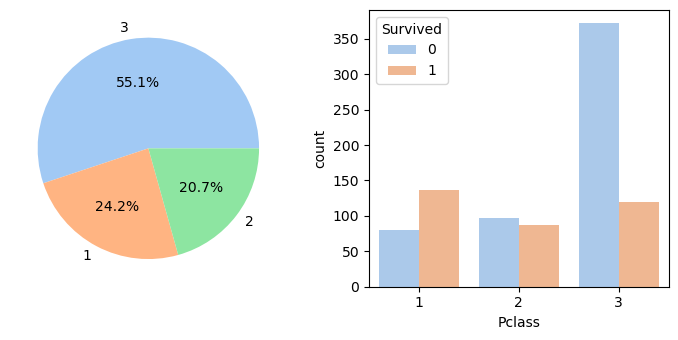

In [363]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
figure, axes = plt.subplots(1, 2)
Pclass_count = df['Pclass'].value_counts()
Pclass_label = Pclass_count.index
axes[0].pie(Pclass_count, labels=Pclass_label, autopct='%.1f%%')
sns.countplot(df, x='Pclass', hue='Survived', ax = axes[1])
plt.show()

A greater proportion of passengers survived in higher cabin classes than those in lower cabin classes.

## Relationship between 'Embarked' and 'Survived' 

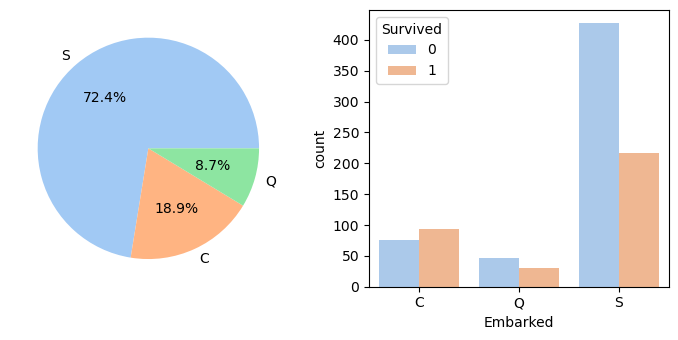

In [364]:
figure, axes = plt.subplots(1, 2)
embarked_count = df['Embarked'].value_counts()
embarked_label = embarked_count.index
axes[0].pie(embarked_count, labels=embarked_label, autopct='%.1f%%')
sns.countplot(df, x='Embarked', hue='Survived', ax=axes[1])
plt.show()

Cherbourg embarked passengers who survived in greater numbers than those who were killed, while the opposite was seen in Queenstown and Southampton.

## Relationship between 'FamilyNum' and 'Survived' 

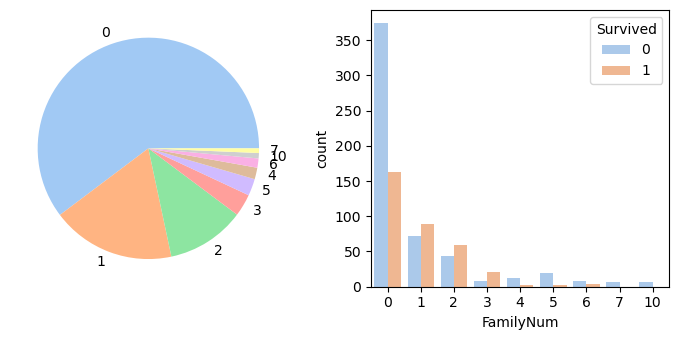

In [365]:
figure, axes = plt.subplots(1, 2)
familyNum_count = df['FamilyNum'].value_counts()
familyNum_label = familyNum_count.index
axes[0].pie(familyNum_count, labels=familyNum_label)
sns.countplot(df, x='FamilyNum', hue='Survived', ax=axes[1])
plt.show()

* More solo passengers were killed than survived. 
* The number of survivors exceeded the number of dead when there were between 1-3 family members. However, the opposite occurs with families of more than 3 persons.

# Data Analysis

In [366]:
import statsmodels.api as sm

### 1. Remove Irrelevant Variables

In [367]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilyNum
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,0
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,0


### 2. Add Dummy Variables

In [368]:
df = pd.get_dummies(df, columns=['Pclass', 'Sex','Embarked'], dtype=int, drop_first=True)
df

,Survived,Age,SibSp,Parch,FamilyNum,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.000000,1,0,1,0,1,1,0,1
1,1,38.000000,1,0,1,0,0,0,0,0
2,1,26.000000,0,0,0,0,1,0,0,1
3,1,35.000000,1,0,1,0,0,0,0,1
4,0,35.000000,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,0,1,0,1,0,1
887,1,19.000000,0,0,0,0,0,0,0,1
888,0,29.699118,1,2,3,0,1,0,0,1
889,1,26.000000,0,0,0,0,0,1,0,0


### 3. Select 'y' && 'X'

In [369]:
y = df['Survived']
X = df.drop('Survived', axis =1)

### 4. Check Correlation

In [370]:
X.corr().abs()

,Age,SibSp,Parch,FamilyNum,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
Age,1.000000,0.232625,0.179191,0.248512,0.006589,0.281004,0.084153,0.013855,0.027121
SibSp,0.232625,1.000000,0.414838,0.890712,0.055932,0.092548,0.114631,0.026354,0.070941
Parch,0.179191,0.414838,1.000000,0.783111,0.000734,0.015790,0.245489,0.081228,0.063036
FamilyNum,0.248512,0.890712,0.783111,1.000000,0.038594,0.071142,0.200988,0.058592,0.079977
Pclass_2,0.006589,0.055932,0.000734,0.038594,1.000000,0.565210,0.064746,0.127301,0.192061
Pclass_3,0.281004,0.092548,0.015790,0.071142,0.565210,1.000000,0.137143,0.237449,0.009511
Sex_male,0.084153,0.114631,0.245489,0.200988,0.064746,0.137143,1.000000,0.074115,0.125722
Embarked_Q,0.013855,0.026354,0.081228,0.058592,0.127301,0.237449,0.074115,1.000000,0.496624
Embarked_S,0.027121,0.070941,0.063036,0.079977,0.192061,0.009511,0.125722,0.496624,1.000000


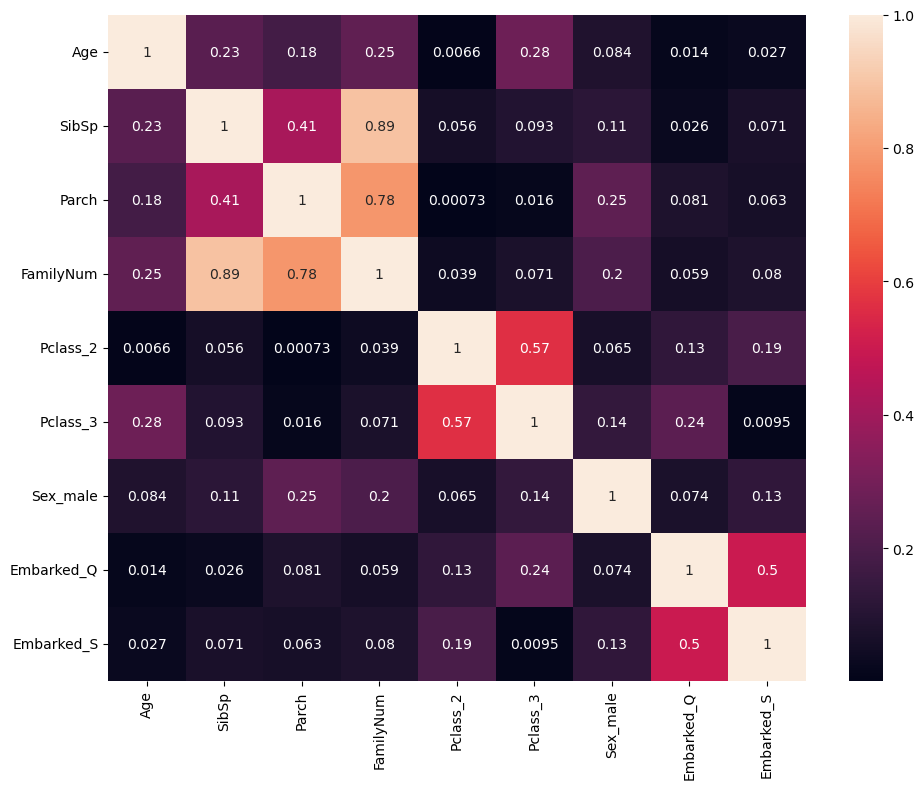

In [371]:
plt.figure(figsize=(10, 8))
plt.rcParams["figure.autolayout"] = True
sns.heatmap(X.corr().abs(), annot= True)
plt.tight_layout()
plt.show()

**summary:**
high correlation value: 'Parch' ---> 'FamilyNum'; 'SibSp' ---> 'FamilyNum'

In [372]:
X = X.drop(['Parch', 'SibSp'], axis = 1)

### 5. Add constant

In [373]:
X = sm.add_constant(X)
X

,const,Age,FamilyNum,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1.0,22.000000,1,0,1,1,0,1
1,1.0,38.000000,1,0,0,0,0,0
2,1.0,26.000000,0,0,1,0,0,1
3,1.0,35.000000,1,0,0,0,0,1
4,1.0,35.000000,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...
886,1.0,27.000000,0,1,0,1,0,1
887,1.0,19.000000,0,0,0,0,0,1
888,1.0,29.699118,3,0,1,0,0,1
889,1.0,26.000000,0,0,0,1,0,0


### 6. Build Logistic Regression Model

In [374]:
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.441520
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Wed, 24 Jul 2024   Pseudo R-squ.:                  0.3370
Time:                        21:48:02   Log-Likelihood:                -393.39
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.549e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3124      0.429     10.063      0.000       3.472       5.152
Age           -0.0390      0.008     -4.974      0.000      -0.054      -0.024
FamilyNum     -0.2017      0.065     -3.087      0.002      -0.330      -0.074
Pclass_2      -1.0293      0.269     -3.823      0.000      -1.557      -0.502
Pclass_3      -2.2907      0.254     -9.026      0.000      -2.788      -1.793
Sex_male      -2.7405      0.200    -13.710      0.000      -3.132      -2.349
Embarked_Q    -0.0943      0.379     -0.249      0.804      -0.837       0.648
Embarked_S    -0.5075      0.235     -2.156      0.031      -0.969      -0.046
==============================================================================
"""

### 7. Check P - Value

The P - value of 'Embarked_Q', 'Embarked_S' almost > 0.05 ---> drop them

In [375]:
X = X.drop(['Embarked_Q', 'Embarked_S'], axis=1)

In [376]:
model = sm.Logit(y, X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Wed, 24 Jul 2024   Pseudo R-squ.:                  0.3323
Time:                        21:48:02   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0620      0.404     10.049      0.000       3.270       4.854
Age           -0.0395      0.008     -5.065      0.000      -0.055      -0.024
FamilyNum     -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Pclass_2      -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3      -2.3458      0.242     -9.676      0.000      -2.821      -1.871
Sex_male      -2.7854      0.198    -14.069      0.000      -3.173      -2.397
==============================================================================
"""

**Summary:**
The logistic regression model predicted that an increase in (or presence of) the following factors would decrease the probability of surviving: 
* Age
* Number of family members travelling together
* Not being in first class
* Male

In [377]:
# Age
np.exp(-0.0395)

0.9612699539905982

For every year of age, the probability of survival * 96.13% (i.e., the probability of survival decreases by 3.87%.

In [378]:
# FamilyNum
np.exp(-0.2186)

0.803643111115195

For each additional family member travelling together, the probability of survival * 80.36% (i.e., the probability of survival decreases by 16.4%.

In [379]:
# Pclass_2
np.exp(-1.1798)

0.30734020049483596

The probability of survival of a second-class passenger is about 69.27% lower than that of a first-class passenger.

In [380]:
# Pclass_3
np.exp(-2.3458)

0.09577055503172162

The probability of survival of a third-class passenger is about 90.42% lower than that of a first-class passenger.

In [381]:
# Sex_male
np.exp(-2.7854)

0.061704402333015156

Male passengers are 0.06 times as likely to survive as female passengers.

Summary based on model parameter values:
* Younger passengers have a higher probability of survival;
* Female passengers have a higher probability of survival than male passengers;
* Passengers from ships with a high cabin class have a higher probability of survival;
* Passengers who travelled with fewer family members had a higher probability of survival.

## Predict Survived

In [382]:
df1 = pd.read_csv('titanic_test.csv')
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [383]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [384]:
df1['Age'] = df1['Age'].fillna(df1['Age'].mean())
df1['Age'].isna().sum()

0

In [385]:
df1['FamilyNum'] = df1['SibSp'] + df1['Parch']

In [386]:
df1 = df1.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

In [387]:
df1.head()

,Pclass,Sex,Age,FamilyNum
0,3,male,34.5,0
1,3,female,47.0,1
2,2,male,62.0,0
3,3,male,27.0,0
4,3,female,22.0,2


In [388]:
df1['Pclass'] = pd.Categorical(df1['Pclass'], categories=['1', '2', '3'])
df1['Sex'] = pd.Categorical(df1['Sex'], categories=['female', 'male'])

In [389]:
df1 = pd.get_dummies(df1, columns = ['Pclass', 'Sex'], dtype = int, drop_first = True)
df1.head()

,Age,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,34.5,0,0,0,1
1,47.0,1,0,0,0
2,62.0,0,0,0,1
3,27.0,0,0,0,1
4,22.0,2,0,0,0


In [390]:
X_test = df1[['Age', 'FamilyNum', 'Pclass_2', 'Pclass_3', 'Sex_male']]
X_test = sm.add_constant(X_test)
predicted_value = model.predict(X_test)

In [391]:
df1['predicted_value'] = predicted_value
# Assuming 'predicted_value' > 0.5 as survived
df1['Survival'] = np.where(df1['predicted_value'] > 0.5, 1, 0)

In [392]:
df1

,Age,FamilyNum,Pclass_2,Pclass_3,Sex_male,predicted_value,Survival
0,34.50000,0,0,0,1,0.478514,0
1,47.00000,1,0,0,0,0.879434,1
2,62.00000,0,0,0,1,0.236473,0
3,27.00000,0,0,0,1,0.552361,1
4,22.00000,2,0,0,0,0.940242,1
...,...,...,...,...,...,...,...
413,30.27259,0,0,0,1,0.520230,1
414,39.00000,0,0,0,0,0.925647,1
415,38.50000,0,0,0,1,0.439306,0
416,30.27259,0,0,0,1,0.520230,1
